In [ ]:
"""
Archive Version: 2.0
This is the second iteration version during the reconstruction process.
"""

In [1]:
from IPython.core.display import HTML
from notebook_css import css
HTML(css)

In [113]:
import os
mnist_dir = '/notebooks/Freund\'s_Shrine/Data/MNIST/mnist_npy'

x_s_train = np.load(os.path.join(mnist_dir, 'mnist_train_images.npy'))
y_s_train = np.load(os.path.join(mnist_dir, 'mnist_train_labels.npy'))
x_s_test = np.load(os.path.join(mnist_dir, 'mnist_test_images.npy'))
y_s_test = np.load(os.path.join(mnist_dir, 'mnist_test_labels.npy'))

[7 2 1 0 4 1 4 9 5 9]


<IPython.core.display.Javascript object>


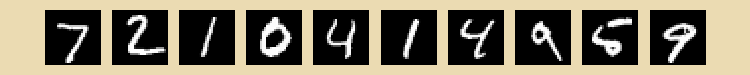

[7 3 4 6 1 8 1 0 9 8]


<IPython.core.display.Javascript object>


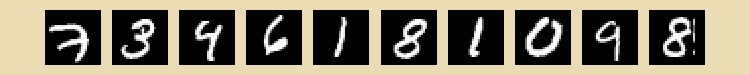

In [114]:
print(np.argmax(y_s_test[:10], 1))
image_plot([_.reshape(28,28) for _ in x_s_test[:10]])
print(np.argmax(y_s_train[:10], 1))
image_plot([_.reshape(28,28) for _ in x_s_train[:10]])

In [ ]:
import itertools

import feature_visualization as fv

class nn_visualizer(object):
    def __init__(self, nn, x_s, y_s, trace_dict):
        """
        :param x_s:
            2-d array-like. This is supposed to be the numpy-style training \
            set or test set, whereas `x_coords` and `y_coords` are the \
            corresponding matplotlib-style data!
        """
        """ alternatives: groupby, filter everytime, boolean indexing \
        everytime, np.indices. """
#         self.x_coords_all_classes, self.y_coords_all_classes = [], []
#         keyfunc = lambda xy: np.argmax(xy[1], 1)
#         xy_s = sorted(zip(x_s, y_s), keyfunc)
#         for k, g in itertools.groupby(xy_s, keyfunc):
#             """ `g`: xy_class_j """
#             x_s_class_j = np.array(list(g))[:, 0]
        self.x_s = x_s
        self.y_s = y_s
        self.f = lambda _, params: enn.logits(_.T, *params).T
        
        sampling_magnitude = 10
        self.grid = (sampling_magnitude, sampling_magnitude)
        self.xy_coords_test = fv.sampling(
            'square', 'matplotlib', sampling_magnitude)
        assert hasattr(nn, 'predict') and hasattr(nn, 'logits')
        self.get_labels_test = lambda params: nn.predict(
            xy_coords_test.T, *params, one_hot=False).reshape(grid)
        
        f1, f2, f3 = f(xy1), f(xy2), f(xy_coords_test)
        
    def dataset_plot(self):
        md_display('Step 1: Prepare the data set')
        global xy1, xy2
        fig, ax = plt.subplots(1, 1, figsize=(4,4))
        fv.style_initialize(ax)
        for class_j in range(enn.config.num_of_class):
            ax.plot(self.x_s[np.where(np.argmax(y_s, 1) == class_j)])
        ax.plot(*xy1, 'bo', markersize=2, )
        ax.plot(*xy2, 'ro', markersize=2, )
        ax.legend(['class 1', 'class 2'])
        plt.show()

        

In [36]:
"""
important notice: the matplotlib version is 2.1.0 and 2.2.3, and python version is 3.5.
"""

import math
import numpy as np
import matplotlib.widgets as widgets
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.figure import figaspect
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection

import feature_visualization as fv
from Kant import ordinal
from switch import switch
from enn_v1_0 import ENN
from feature_visualization import md_display


fv.reset()
[x_coords, y_coords] = fv.sampling('quadratic', 'matplotlib', 50)
xy1 = np.array([x_coords, y_coords+0.4])
xy2 = np.array([x_coords, y_coords-0.45])
""" `x` here means input feature vector x """
x_s_train = np.hstack([xy1, xy2]).T
y_s_train = np.array([[1, 0]]*50 + [[0, 1]]*50)
    
    
sampling_magnitude = 10
grid = (sampling_magnitude, sampling_magnitude)
xy_coords_test = fv.sampling('square', 'matplotlib', sampling_magnitude)

def dataset_plot():
    md_display('Step 1: Prepare the data set')
    global xy1, xy2
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    fv.style_initialize(ax)
    ax.plot(*xy1, 'bo', markersize=2, )
    ax.plot(*xy2, 'ro', markersize=2, )
    ax.legend(['class 1', 'class 2'])
    plt.show()


def training_process():
    md_display('Step 2: Training Process')
    enn = ENN(max_degree=2)    
    trace_dict = enn.fit(x_s_train, y_s_train, 20, True)
    return enn, trace_dict


def vars_trace_plot():
    md_display('Step 3: Training Process Plotting')
    global enn, trace_dict
    fv.jtplot.style('chesterish')
    
    """ var_trace location & switch statements count and location """
    def var_trace_plot(var_trace, var_type):
        assert var_trace.ndim == 3
        
        """ initialize the plotting params. """
        num_of_xcoords = var_trace.shape[0]
        num_of_line = var_trace.shape[1]
        num_of_col = var_trace.shape[2]
        x_coord_1st = 0 if var_type != 'gradients' else 1
        x_coords = range(x_coord_1st, num_of_xcoords + x_coord_1st)
#         if var_trace != 'loss':
        fig, axes = plt.subplots(
            1, num_of_col, figsize=(11,5.5), sharex=True, sharey=True)
#         else:
#         fig, axes = plt.subplots(
#             2, 1, figsize=(11,22), sharex=True, sharey=True)
        axes = np.array(axes).flatten()
        fv.style_initialize(axes)
        
        """ determine the var type and plot. """
        for case in switch(var_type):
            if case('weights') \
            or case('gradients'):
                legend = [
                    r'$w(%s)$' % ''.join([
                    r'' if not pow_ \
                    else r'x_%s' % k if pow_ == 1 \
                    else r'x^%s_%s' % (pow_, k) \
                    for k, pow_ in enumerate(term_i)
                ]) for term_i in enn.fp_transformation] + [r'$bias$'] \
                if case('weights') else [
                    r'$\partial{J}\ / \partial{w_{%sj}}$' % i 
                    for i in range(num_of_line-1)
                ] + [r'$\partial{J}\ / \partial{bias_j}$']
            
                """ stack `W` and `b` together can avoid redundant plotting \
                code in the following. """
#                 var_trace = np.vstack((trace_dict['W'], trace_dict['b']))
                for dim_j in range(num_of_col):
                    for i in range(num_of_line):
                        axes[dim_j].plot(
                            x_coords,
                            var_trace[:, i, dim_j]
                        )
                    """ `legend` should be caculated finally here when var \
                    type is weights. """
                    if case('gradients'):
                        axes[dim_j].legend(
                            [_.replace('j', str(dim_j)) for _ in legend])
                    else:
                        axes[dim_j].legend(legend)
                    axes[dim_j].set_title(
                        r'dimension %d of new space' % dim_j, y=1.05)
                    axes[dim_j].set_ylabel(var_type)
                    axes[dim_j].set_xlabel('step', labelpad=10)
                plt.show()
                break
            if case('loss'):
                """ TODO: loss-elementwise & loss-dimwise """
                global lc_s
                lc_s, annot_s = [], []
                for dim_j in range(num_of_col):
                    """
                    fisrt add x coordinates (`stack`), e.g:
                    [0.2    [0.3   ____\   [(0,0.2)    [(0,0.3) 
                     0.6],  -0.4]      /    (1,0.6)],  -(1,0.4)]  
                    then permute dims to adapt to the input format of \
                    `LineCollection` (`transpose`).
                    """
                    lines = np.transpose(
                        np.stack([
                            np.broadcast_to(
                                x_coords, (num_of_line, num_of_xcoords)).T, 
                            var_trace[:,:,dim_j]
                        ], axis=2), 
                        (1, 0, 2)
                    )
                    """ split according to the type of class. """
                    lines = np.split(lines, enn.config.num_of_class)
                    lc_s_dim_j = []
                    cmap_all_class = ['Blues', 'Reds']
                    color_all_class = ['b', 'r']
                    for j, lines_class_j in enumerate(lines):
                        """ attention the two meanings of `j` """
                        lc = LineCollection(
                            lines_class_j, cmap=cmap_all_class[j], )
                        """ set the line colors """
                        lc.set_array(np.linspace(10, 40, len(lines_class_j)))
                        lc.set_clim(0, 50)
                        axes[dim_j].add_collection(lc)
                        lc_s_dim_j.append(lc)
                        
                        axes[dim_j].plot(
                            x_coords,
                            np.mean(lines_class_j[:, :, 1], 0),
                            linestyle='--', color=color_all_class[j], \
                            linewidth=2
                        )
                        
                    axes[dim_j].autoscale()
                    axes[dim_j].set_title(
                        r'dimension %d of new space' % dim_j, y=1.05)
                    axes[dim_j].set_ylabel('loss per sample')
                    axes[dim_j].set_xlabel('step', labelpad=10)
                    axes[dim_j].legend(handles=[
                        Patch(facecolor='b', label='class 1'),
                        Patch(facecolor='r', label='class 2')
                    ])
                    lc_s.append(lc_s_dim_j)
                    
                    """ ref temporarily: https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib """
                    annot = axes[dim_j].annotate(
                        "", xy=(0,0), xytext=(5,5),
                        textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                    )
                    annot.set_visible(True)
                    annot_s.append(annot)
                    
                def hover(event):
                    if event.inaxes:
                        """ idx of target ax. """
                        idx = list(axes).index(event.inaxes)
                        """ retrive lcs of all classes in the target ax. """
                        for j, lc in enumerate(lc_s[idx]):
#                             display(j)
                            is_contain, idx_dict = lc.contains(event)
                            if is_contain:
                                annot_s[idx].xy = event.xdata, event.ydata
                                """ ref temporarily: https://stackoverflow.com/questions/9647202/ordinal-numbers-replacement """
                                """ find the sample size of `j-1` class. """
                                line_quantity_of_pre_classes = \
                                    j * len(lines[j-1]) if j > 0 else 0
                                annot_s[idx].set_text(
                                    '%s sample' % \
                                    ordinal(idx_dict['ind'][0] + 
                                            line_quantity_of_pre_classes)
                                )
                                annot_s[idx].get_bbox_patch().set_alpha(0.4)
                                annot_s[idx].set_visible(True)
                                fig.canvas.draw_idle()
                                return
                    for _ in annot_s: _.set_visible(False)
                    fig.canvas.draw_idle()               
                    
                fig.canvas.mpl_connect("motion_notify_event", hover)
                plt.show()
                break
            elif case('default'):
                raise AssertionError('invalid var type!')

#     var_trace_plot(
#         np.concatenate((trace_dict['W'], trace_dict['b'][:,np.newaxis,:]), 1), 
#         'weights'
#     )
#     var_trace_plot(
#         np.concatenate(
#             (trace_dict['W_grad'], trace_dict['b_grad'][:,np.newaxis,:]), 1),
#         'gradients'
#     )
    var_trace_plot(trace_dict['loss'], 'loss')  

    fv.reset()

    
"""------------------"""

def activation_func_plot():
    global initial
    if initial:
        md_display('Step 4: Scalar-Valued Function Learned Plotting')

        global fig_af, axes_af, clim, surf_s
        fig_af = plt.figure(figsize=(11,5.5))
        fig_af.subplots_adjust(left=0.08, right=0.92, wspace=0.04)
        
        """ determine the min and max of logits across the whole training \
        process. """
        clim = [0, 0]
        for params_ in zip(trace_dict['W'], trace_dict['b']):
            f3_ = enn.logits(xy_coords_test.T, *params_).T
            min_, max_ = np.min(f3_), np.max(f3_)
            if clim[0] > min_: clim[0] = min_ 
            if clim[1] < max_: clim[1] = max_ 
        
        axes_af, surf_s = [], []
        for dim_j in range(len(f3)):
            ax = fig_af.add_subplot(1, len(f3), dim_j+1, projection='3d')
            ax.set_title(
                'nonlinear function learned of dim %d' % dim_j, y=1.05)
            ax.set_zlim(*clim)
            axes_af.append(ax)
        axes_af[0]._shared_x_axes.join(*axes_af)
        axes_af[0]._shared_y_axes.join(*axes_af)
        
        global cbar_ax, m, cbar
        cbar_ax = fig_af.add_axes([0.92, 0.15, 0.02, 0.7])
        m = cm.ScalarMappable(cmap='coolwarm')
        m.set_array([])
        m.set_clim(*clim)
        cbar = plt.colorbar(m, cax=cbar_ax)
        
        initial = False
    else:
        for _ in surf_s: _.remove()
        surf_s.clear()
    
    for dim_j, ax in enumerate(axes_af):
        surf = ax.plot_surface(
            *xy_coords_test.reshape(2, *grid), 
            f3[dim_j].reshape(grid),
            cmap='coolwarm'
        )
        surf.set_clim(*clim)
        surf_s.append(surf)
        
#     print('new zlim', new_zlim)
    plt.show()
    
    
def decision_boundary_plot():
    global initial
    if initial:
        md_display('Step 5: Decision Boundary Plotting')
    
        global fig_db, ax_db, db
        fig_db, ax_db = plt.subplots(figsize=(5.5,5.5))
        fv.style_initialize(ax_db)
        ax_db.legend(handles=[
            Patch(facecolor='b', label='class 1'),
            Patch(facecolor='r', label='class 2')
        ])
        
        ax_db.plot(*xy1, 'bo', markersize=2, )
        ax_db.plot(*xy2, 'ro', markersize=2, )
        initial = False
    else:
        for _ in db.collections: _.remove()
    
    db = ax_db.contourf(
        *xy_coords_test.reshape(2, *grid), 
        labels_test, 
        cmap='RdBu_r', alpha=0.6, zorder=-5
    )    
    acc_train = enn.accuracy(x_s_train, y_s_train, *params)
    print('Training Accuracy:', acc_train)
    plt.show()


def transformation_plot():
    global initial
    if initial:
        md_display('Step 6: Transformation Plotting')

        """ in mpl 2.2.3, there is no need `sharex[y]` any more when `equal` \
        is used. furthermore, the plot will fail to render if you use them \
        both! """
        fv.reset()
        global fig_t, axes_t, trans_s
        trans_s = []
        fig_t, axes_t = plt.subplots(1, 2, figsize=(8,4))
        fig_t.subplots_adjust(left=0.06, right=0.93, wspace=0.08)
        """ `axis` will change data lim based current data. """
        fv.style_initialize(axes_t)
        
        for ax in axes_t:
            ax.axis('equal')
            ax.legend(handles=[
                Patch(facecolor='b', label='class 1'),
                Patch(facecolor='r', label='class 2')
            ])
        axes_t[0].set_title('original space', y=1.05)
        axes_t[1].set_title('transformed space', y=1.05)
        axes_t[0].plot(*xy1, 'bo', markersize=1, )
        axes_t[0].plot(*xy2, 'ro', markersize=1, )
        axes_t[1].plot(*f1, 'bo', markersize=2, )
        axes_t[1].plot(*f2, 'ro', markersize=2, )
        
        global con_s_1, con_s_2
        con_s_1 = fv.connection_plot(axes_t[1], axes_t[0], f1, xy1)
        con_s_2 = fv.connection_plot(axes_t[1], axes_t[0], f2, xy2)
        
        """ diagonal line """
        for ax in axes_t: 
            ax.plot([-10,0,10], [-10,0,10], '--k', alpha=0.2, zorder=-5)
            ax.plot([0], [0], 'ko', zorder=-5)
        """ priority: lim setter > sharex & sharey | autoscale_view"""
        
        initial = False
    else:
        for _ in trans_s: _.remove()
        trans_s.clear()

        axes_t[1].lines[0].set_data(*f1)
        axes_t[1].lines[1].set_data(*f2)
        
        for con, xy in zip(con_s_1, f1.T): con.xy1 = xy
        for con, xy in zip(con_s_2, f2.T): con.xy1 = xy
    
    for ax, xy in zip(axes_t, [xy_coords_test, f3]):
        trans = ax.pcolormesh(
            *xy.reshape(2, *grid), 
            labels_test, 
            cmap='coolwarm', edgecolor='white', alpha=0.5, zorder=-1
        )
        ax.grid(True, linestyle='--', alpha=1.)
        trans_s.append(trans)
    
    """ css | dpi | figsize, ax size | tight """
    """ set_[]lim, ax.axis, updata_datalim, update_from_..., margin """
    new_xlim = min(-1, f3[0].min()), max(1, f3[0].max())
    new_ylim = min(-1, f3[1].min()), max(1, f3[1].max())
    
    """ ax.update_datalim not work. """
    """ seems the same as `ax.set_[x|y]lim`. """
    for ax in axes_t: ax.axis([*new_xlim, *new_ylim])
    
    """ ref: https://stackoverflow.com/questions/7386872/make-matplotlib-autoscaling-ignore-some-of-the-plots """
    """ only `set_lim` and `update_...` together can work? """
    axes_t[0].dataLim.update_from_data_xy(f3.T, ignore=False)
    axes_t[1].dataLim.update_from_data_xy(f3.T, ignore=False)
    
    plt.show()
#     return (*trans_s, *con_s_1, *con_s_2, ax_, s)
    
def image_plot(array_s, title='', cols=10):
    global initial
    if initial:
        fv.jtplot.style('gruvboxl')
        rows = math.ceil(len(array_s)/cols)
        global fig, axes, im_s
        fig, axes = plt.subplots(rows, cols, figsize=(6, 6/(cols/rows)))
        fig.subplots_adjust(left=0.06, right=0.94, top=0.94, bottom=0.06,)
        fig.suptitle(title)

        norm = Normalize(np.min(array_s), np.max(array_s))
        im_s = []
        for array, ax in zip(array_s, axes.flatten()):
            im = ax.imshow(np.atleast_2d(array), cmap='gray', norm=norm)
            im_s.append(im)
        for ax in axes.flatten():
            ax.axis('off')
        fv.reset()
#         initial = False
    else:
        for array, im in zip(array_s, im_s):
            im.set_data(np.atleast_2d(array))
    plt.show()
    
def update(step):
    """ `step`: the index of training step. """
    """ refreshing freq is too slow. how to optimize? """
    global params, labels_test, f, f1, f2, f3
    params = trace_dict['W'][step], trace_dict['b'][step]
    labels_test = enn.predict(
        xy_coords_test.T, *params, one_hot=False).reshape(grid)
    f = lambda _: enn.logits(_.T, *params).T
    f1, f2, f3 = f(xy1), f(xy2), f(xy_coords_test)
    
    #     image_plot(enn.logits(x_s_train, *params), 'transformed feature')
    #     activation_func_plot()
    #     decision_boundary_plot()
#     if initial:
#         yield transformation_plot()
#     else:
    return transformation_plot()
    

In [3]:
""" reconstruct into class? """
# print(get_terms_for_display(enn.fp_transformation))
enn, trace_dict = training_process()

<font face='Goudy Old Style' size=5><span style="color:rgb(0, 92, 84);">Step 2: Training Process</span></font>

training completed.


In [70]:
del fig_db, ax_db, db
del params, labels_test, f, f1, f2, f3
del ax_, s
del update

<font face='Goudy Old Style' size=5><span style="color:rgb(0, 92, 84);">Step 5: Decision Boundary Plotting</span></font>

<IPython.core.display.Javascript object>


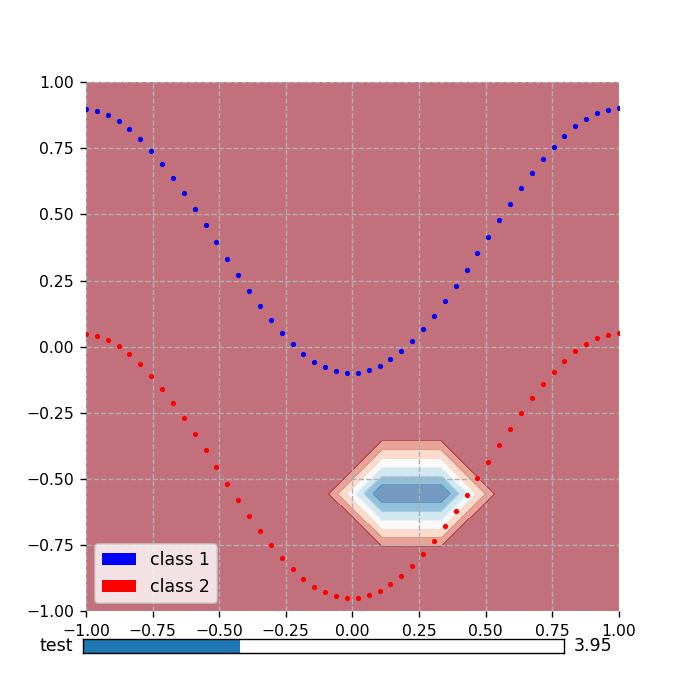

Training Accuracy: 0.5


0

In [68]:
import matplotlib.animation as animation

# dataset_plot()
# vars_trace_plot()
# initial = True
# activation_func_plot()



# transformation_plot()
""" fig and ax must be created outside the `interact`, else empty figure \
will be rendered. """
# image_plot(x_s_train, 'raw feature')
# next(update(0))


# widgets.interact(
#     update, 
#     step=widgets.IntSlider(min=0, max=len(trace_dict['W'])-1),
# )
# ani = animation.FuncAnimation(fig_t, update, frames=20, interval=50, blit=True)
# ani.save('test.mp4', dpi=300)
# image_plot(x_s_train, 'raw feature')
# image_plot(trace_dict['W'], 'weights')
# image_plot(trace_dict['b'], 'bias')
# image_plot()

# plt.hist(x_s_train[:, 0])



<font face='Goudy Old Style' size=5><span style="color:rgb(0, 92, 84);">Step 5: Decision Boundary Plotting</span></font>

<IPython.core.display.Javascript object>


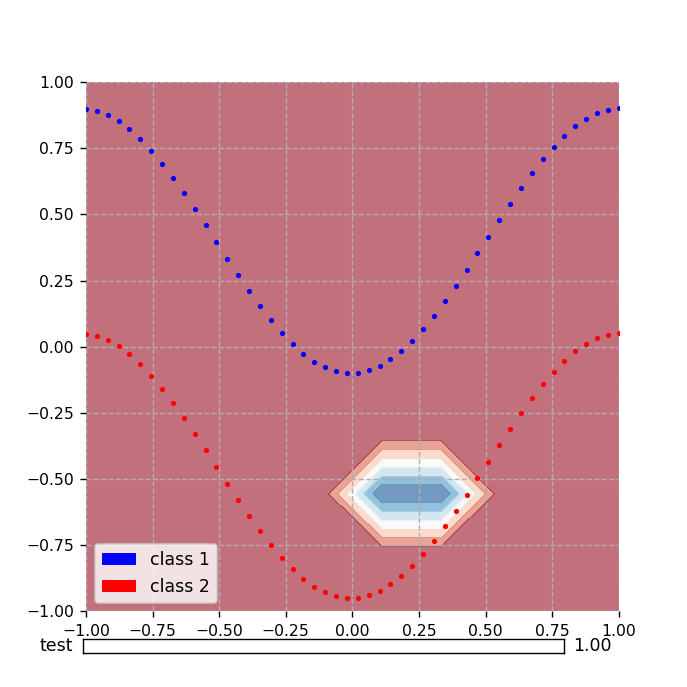

Training Accuracy: 0.5


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'animated'
  s)


[[ 0.84226179  0.13129936]
 [ 0.91456248  0.09447929]
 [ 0.9738286   0.06479326]
 [ 1.02044436  0.04213164]
 [ 1.05497301  0.02632691]
 [ 1.07814111  0.01715066]
 [ 1.09081851  0.01431024]
 [ 1.093995    0.01744551]
 [ 1.08875464  0.02612634]
 [ 1.07624872  0.03985132]
 [ 1.05766849  0.05804834]
 [ 1.03421852  0.08007746]
 [ 1.00709184  0.10523629]
 [ 0.97744731  0.13276837]
 [ 0.94639009  0.16187436]
 [ 0.91495538  0.19172601]
 [ 0.88409573  0.22148268]
 [ 0.85467183  0.25030974]
 [ 0.82744648  0.27739853]
 [ 0.80308149  0.30198681]
 [ 0.78213686  0.32337917]
 [ 0.76507164  0.3409664 ]
 [ 0.75224591  0.35424305]
 [ 0.74392319  0.3628223 ]
 [ 0.74027269  0.36644765]
 [ 0.74137108  0.36500072]
 [ 0.74720329  0.35850487]
 [ 0.75766237  0.3471245 ]
 [ 0.77254835  0.33116   ]
 [ 0.79156624  0.31103864]
 [ 0.81432367  0.28730178]
 [ 0.84032858  0.260589  ]
 [ 0.86898754  0.23161988]
 [ 0.89960535  0.20117419]
 [ 0.93138655  0.17007138]
 [ 0.96343945  0.13915019]
 [ 0.99478315  0.10924914]
 

<IPython.core.display.Javascript object>


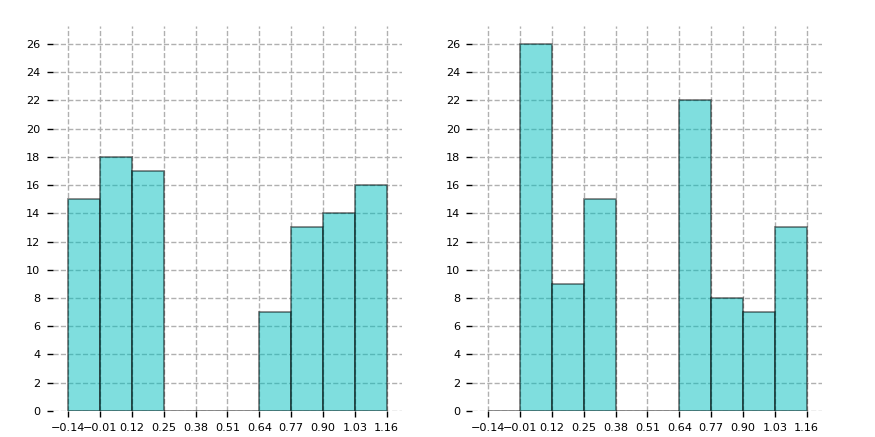

[-0.14, 1.16]


In [39]:
# dataset_plot()

def hist_plot(x_s):
    global initial
    if initial:
        x_s = np.array(x_s)
        feature_dim = x_s.shape[1]
        rows = math.ceil(feature_dim / 3)
        cols = feature_dim if feature_dim < 4 else 3
        figsize = (3.5*cols, 3.5*rows) if cols < 3 else (9, 4.5*rows)
        global fig_h, axes_h
        fig_h, axes_h = plt.subplots(rows, cols, figsize=figsize, sharey=True)
        fig_h.subplots_adjust(left=0.06, right=0.94, top=0.94, bottom=0.06)
        
        min_, max_ = np.min(x_s), np.max(x_s)
        """ amplification factor """
        af = (10 ** 2) if max_ - min_ < 5 else 1
        bin_edge_range = [math.floor(min_*af)/af, math.ceil(max_*af)/af]
        print(bin_edge_range)
        bins = 10
        
        values_s = []
        for coords, ax in zip(x_s.T, axes_h.flatten()):
            ax.grid(linestyle='--', alpha=1.)
            ax.tick_params(labelsize=6.5)
            for spine in ax.spines.values(): spine.set_visible(False)
            
            values, bin_edge_s, __ = ax.hist(
                coords, np.linspace(*bin_edge_range, bins+1),
                color='c', alpha=0.5, ec='k', zorder=5
            )
            values_s += list(values)
            ax.set_xticks([_ for _ in bin_edge_s])
            ax.yaxis.set_tick_params(labelleft=True)
        ax.set_yticks(range(0, int(np.max(values_s))+1, 2))
#         initial = False
    else:
        pass
    plt.show()
    
initial = True
a = enn.logits(x_s_train, trace_dict['W'][-1], trace_dict['b'][-1])
# print(np.min(a), np.max(a))
# print(x_s_train[:, 1])
print(a)
hist_plot(a)

In [ ]:
trace_dict['W'][-1]

In [ ]:
from IPython.core.display import HTML
from notebook_css import css
HTML(css)

### Following Work
· visualize the gradients, weights, bias. (1)

· multiple graphs visualization in the case of max degree of freedom > 2. (2)

· visualize the space transformation. (3)

· increase the degree of freedom of ENN.

· try to analyze the 3-d data.

· XOR problem.

· add softmax, observe the independence among the gradients, and so on.

· spiral curve problem, conic problem, and so on.

· automatic derivatives calculation using sympy.

· optimize the calculation of value of the polynomial terms.

· linear cls (two line) & linear regression?

· would it converge faster when swapping the label blue and label red?

· remove the bias.

· 不规则的数据会怎样学习扭曲？batch呢？

· 如果是回归问题，转换又会变成什么样？

· w矩阵是如何从单位阵开始变成那样的？

· 样本不均衡

· 二次情况下，两个维度的分类器仍然保持对称吗？

### Design of Visualization Experiment
1.feature
- histogram, space distribution, image-gram

2.weights, bias
- image-gram, histogram
- trace, gradients trace

3.transformed feature
- historam, space transformation, image-gram
- non-linear activation function learned dimension-wise in new space

4.softmax probability
- space transformation, classification boundary

5.loss, loss-sample-wise
- trace with step, trace with weights ($loss_{dim\_j}$ trace about $k\verb|-|th\ sample$), pie chart (proportions from each sample in $\Delta loss_{dim\_j}$, or proportions from each dim in $\Delta loss$ about $k\verb|-|th\ sample$)


In [ ]:
import matplotlib as mpl
print(mpl.get_backend())
print(mpl.is_interactive())

In [ ]:
# global_lc_s[0].get_segments()[0]
figaspect(3/10)